# Credit Card Fraud Detection 


In [460]:
!pip install tensorflow==2.10.0
!pip install keras==2.10.0
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

df = pd.read_csv("C://Users/admin/Downloads/creditcard/creditcard.csv")
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [461]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [462]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## How many are fraud and how many are not fraud ?

In [463]:
class_names = {0:'Not Fraud', 1:'Fraud'}
print(df.Class.value_counts().rename(index = class_names))

Not Fraud    284315
Fraud           492
Name: Class, dtype: int64


## Plotting the variables using subplots

<Axes: >

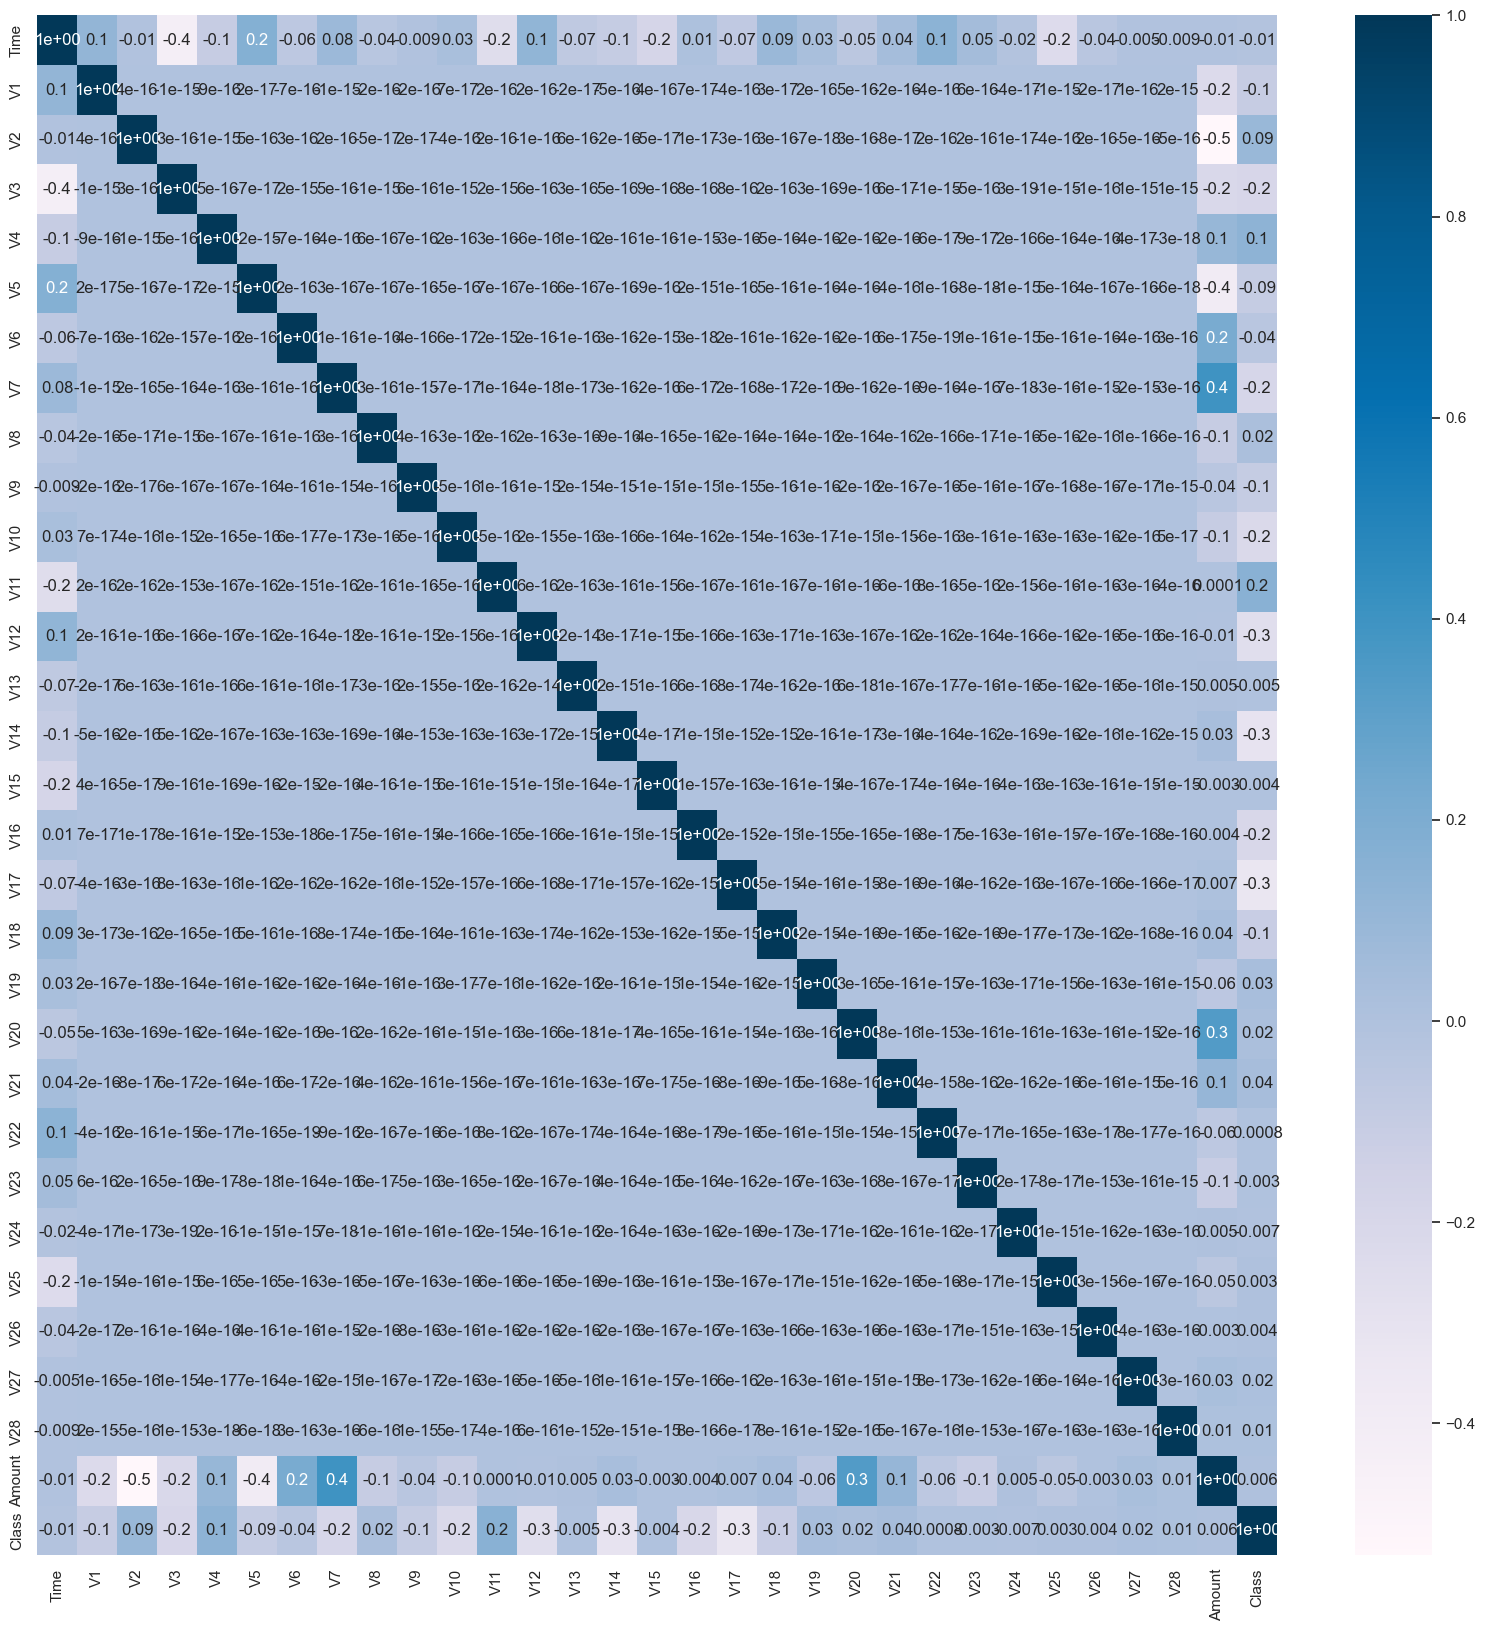

In [464]:
import seaborn as sns
plt.rcParams['figure.figsize'] = (20,20)
sns.heatmap(df.corr(),annot=True,fmt=".1",cmap='PuBu')

In [465]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

<Axes: >

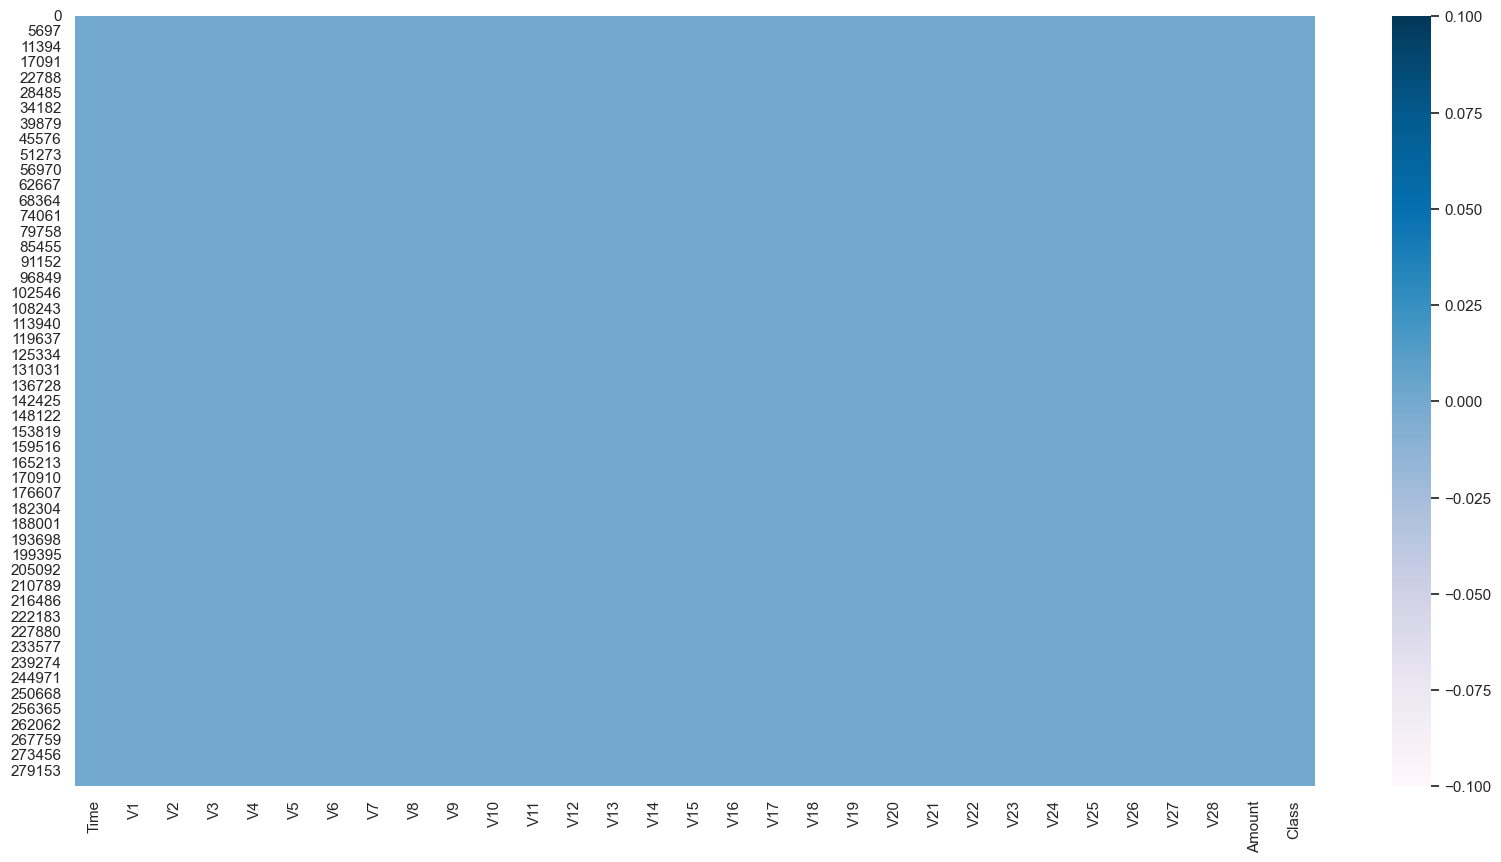

In [466]:
plt.rcParams['figure.figsize'] = (20,10)
sns.heatmap(df.isnull(),cmap='PuBu')

## Checking_Features

In [467]:
from sklearn.feature_selection import SelectKBest,f_classif
X = df.iloc[:,1:-1]
Y =  df.iloc[:,-1]
print(Y.value_counts())


0    284315
1       492
Name: Class, dtype: int64


In [468]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
smo =  NearMiss(sampling_strategy=0.1)
xs, ys = smo.fit_resample(X, Y)

<Axes: title={'center': 'After Smote'}>

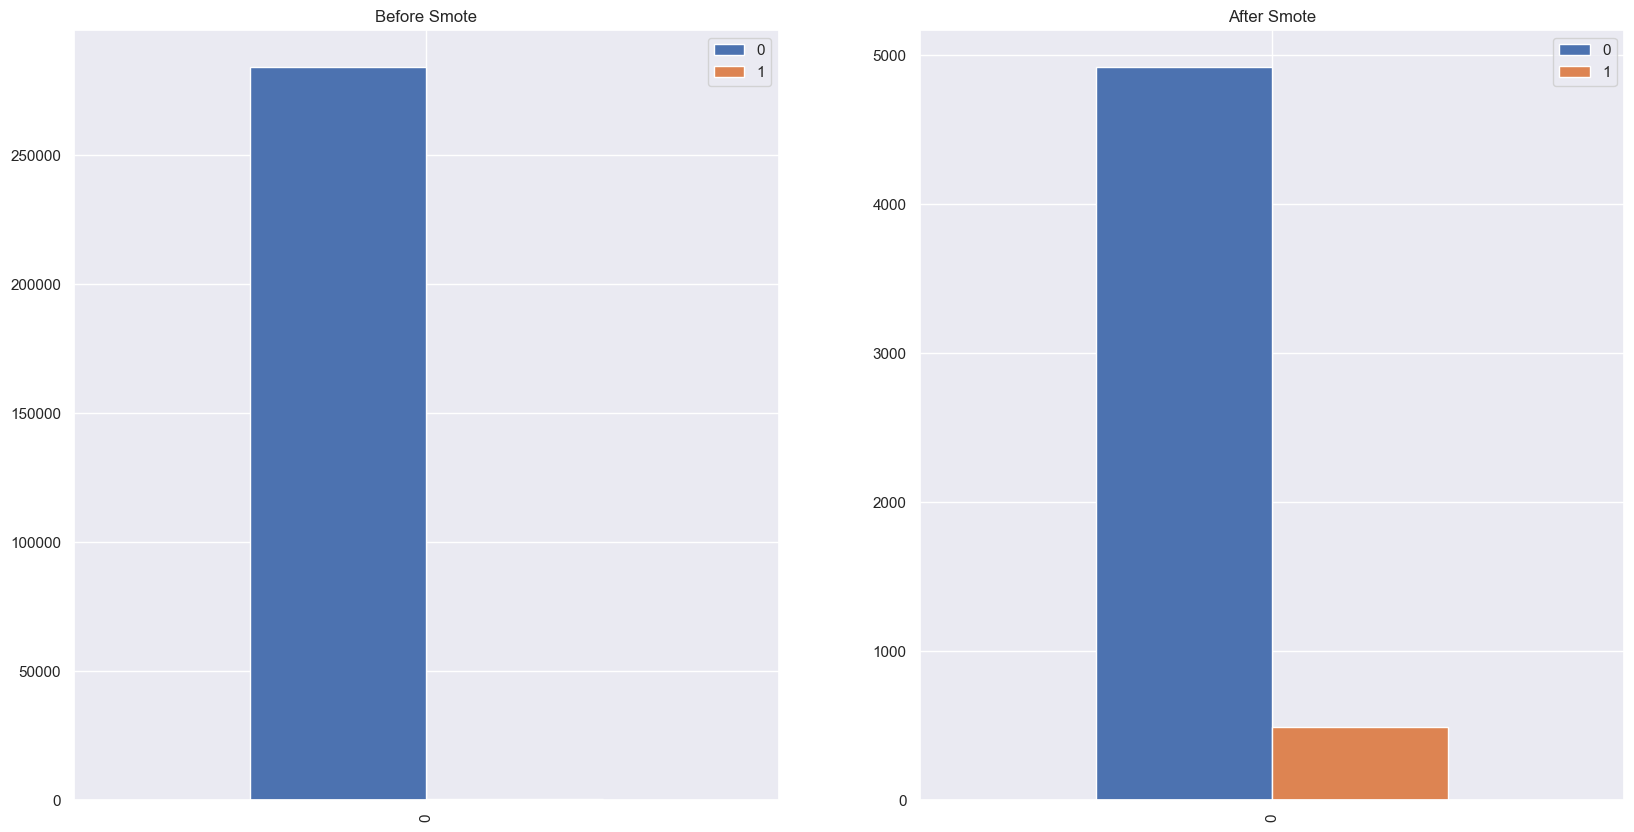

In [469]:
from collections import Counter
fig,ax  = plt.subplots(ncols=2,nrows=1)
Yc = Counter(Y)
ysc  = Counter(ys)

pd.DataFrame([Yc]).plot(kind='bar',ax=ax[0],title='Before Smote')
pd.DataFrame([ysc]).plot(kind='bar',ax=ax[1],title='After Smote')

In [501]:
from sklearn.manifold import TSNE

ts =  TSNE(n_components=2)
xt =  pd.DataFrame(ts.fit_transform(xs))

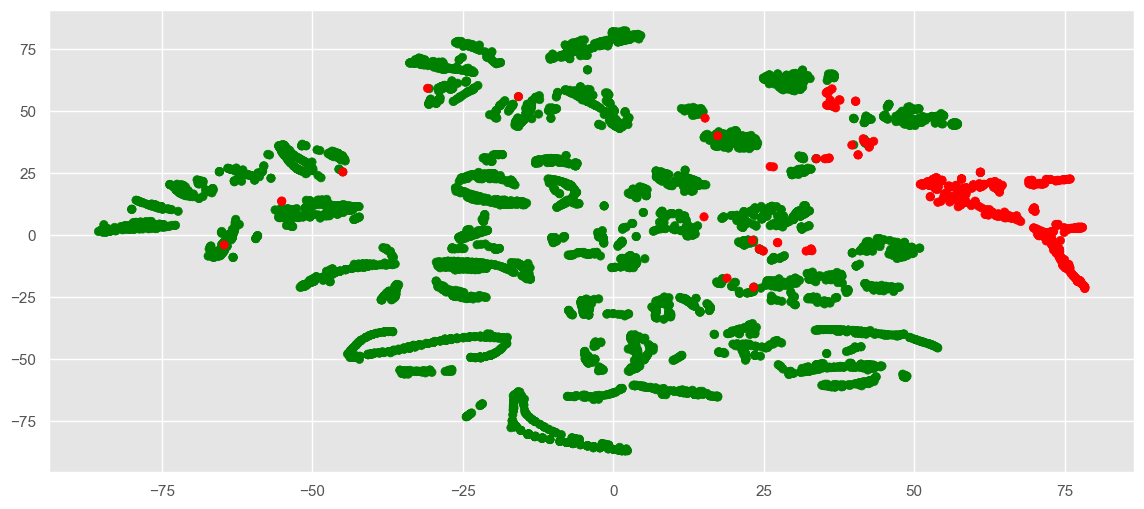

In [502]:

xt['Class'] = ys
color =  {0:'green',1:'red'}

xt['Class']=xt['Class'].map(color)
plt.rcParams['figure.figsize'] = (14,6)
plt.style.use('ggplot')
plt.scatter(x=xt.iloc[:,0],y=xt.iloc[:,1],c=xt.loc[:,'Class'])

### Selecting best k  


In [15]:
best =  SelectKBest(f_classif,k=10)
best.fit(X,Y)
scor_df = pd.DataFrame({"Columns":X.columns,"score":best.scores_})
scor_df.sort_values('score',ascending=False)

,Columns,score
16,V17,33979.168593
13,V14,28695.547788
11,V12,20749.822361
9,V10,14057.979985
15,V16,11443.349428
2,V3,11014.508305
6,V7,10349.605408
10,V11,6999.355047
3,V4,5163.832114
17,V18,3584.380605


In [16]:
XS =  pd.DataFrame(X)
XS['class'] = Y.map(color)

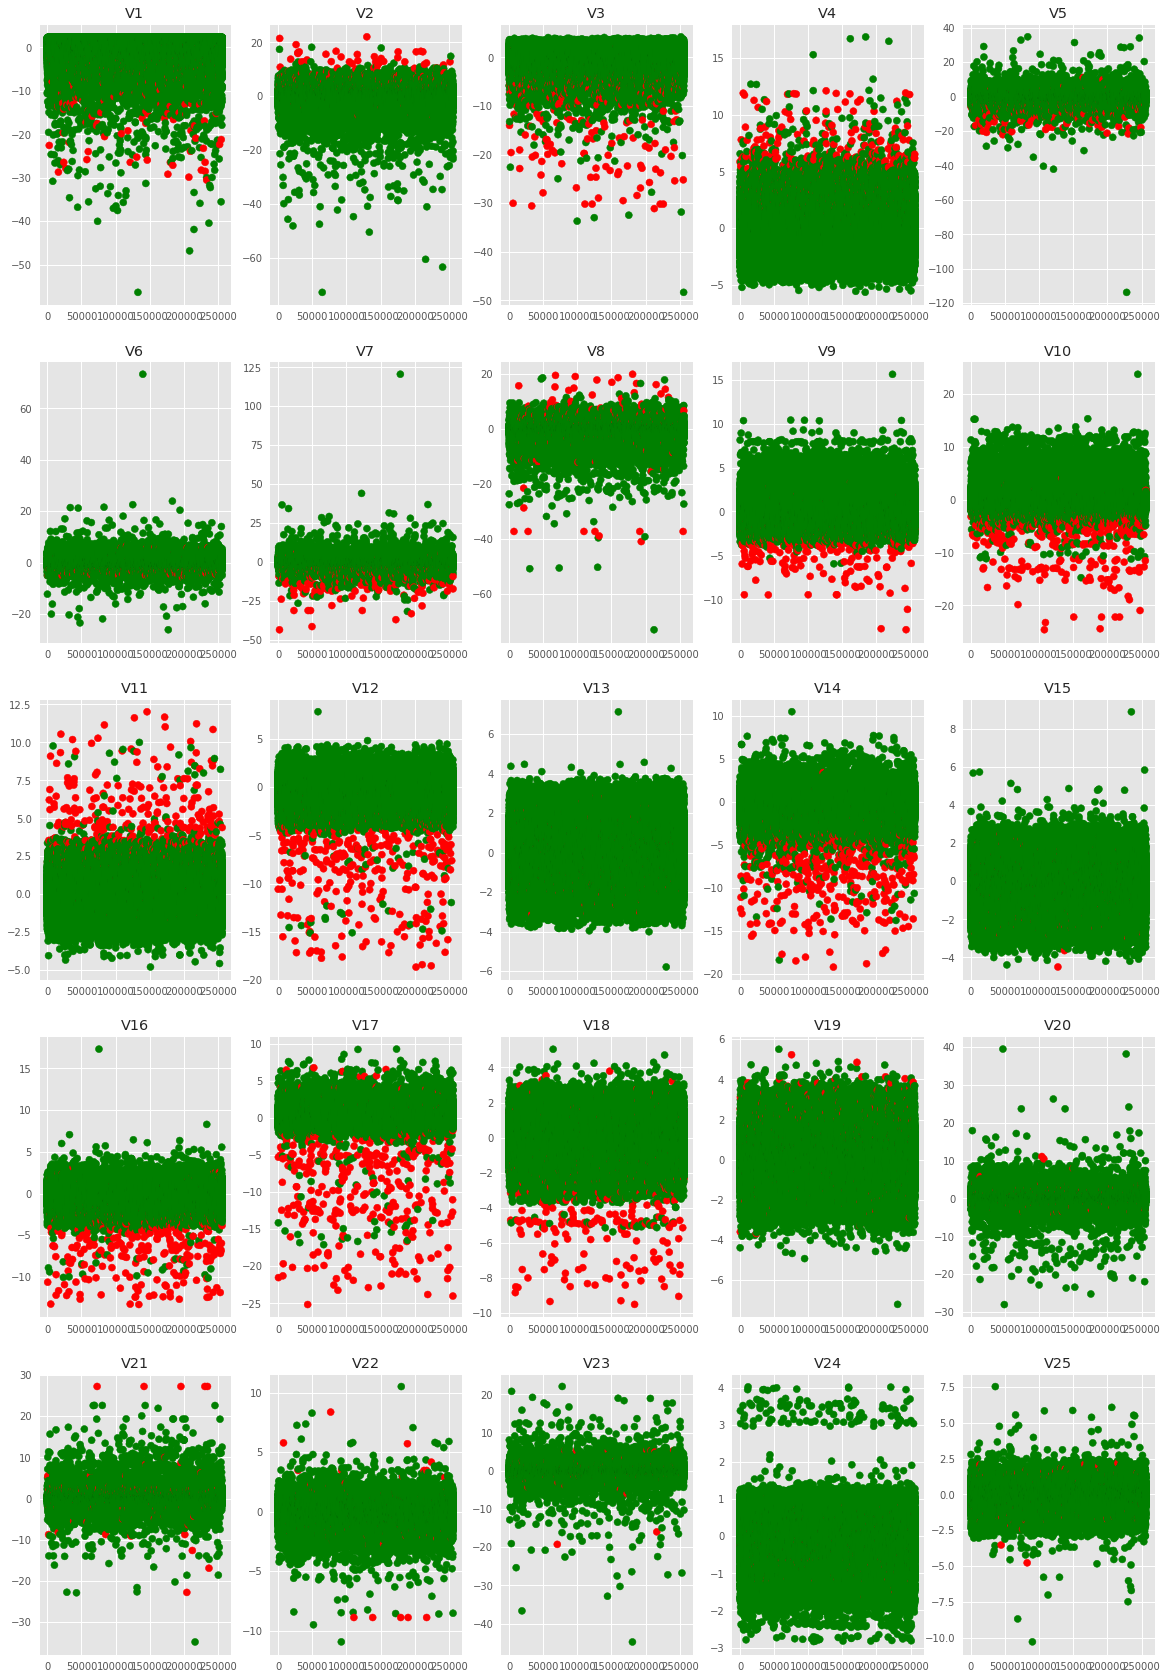

In [17]:
fig,ax =  plt.subplots(ncols=5,nrows=5,figsize=(20,30))
row,col =  0,0
l = []
for i in range(25):
    
    if i%5==0 and not(i==0) and col!=0: row+=1; col = 0
    #if i%5==0 and not(i==0): col = 0
    elif not(i==0):col+=1
    #if i%6==0 and not(i==0):row=0
    #col+=1
    
    bid = 'V'+str(i+1)
    bh  = XS.loc[:,[bid,'class']].sample(frac=0.9)
    ax[row,col].scatter(x=range(len(bh)),y=bh[bid],c=bh['class'])
    ax[row,col].set_title(bid)
    
plt.show()


## Model


In [18]:
from sklearn.cross_validation import train_test_split


/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [122]:
XS = pd.DataFrame(xs)
YS =  pd.Series(ys)

In [123]:
X_train, X_test, y_train, y_test = train_test_split(XS, YS, train_size=0.70, test_size=0.30, random_state=1)
print("Length of X_train is: {X_train}".format(X_train = len(X_train)))
print("Length of X_test is: {X_test}".format(X_test = len(X_test)))
print("Length of y_train is: {y_train}".format(y_train = len(y_train)))
print("Length of y_test is: {y_test}".format(y_test = len(y_test)))

Length of X_train is: 3788
Length of X_test is: 1624
Length of y_train is: 3788
Length of y_test is: 1624


### Logistic

In [21]:
YS.unique()

array([0, 1])

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [23]:
model = LogisticRegression(C=1)
model.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
pred = model.predict(X_test)

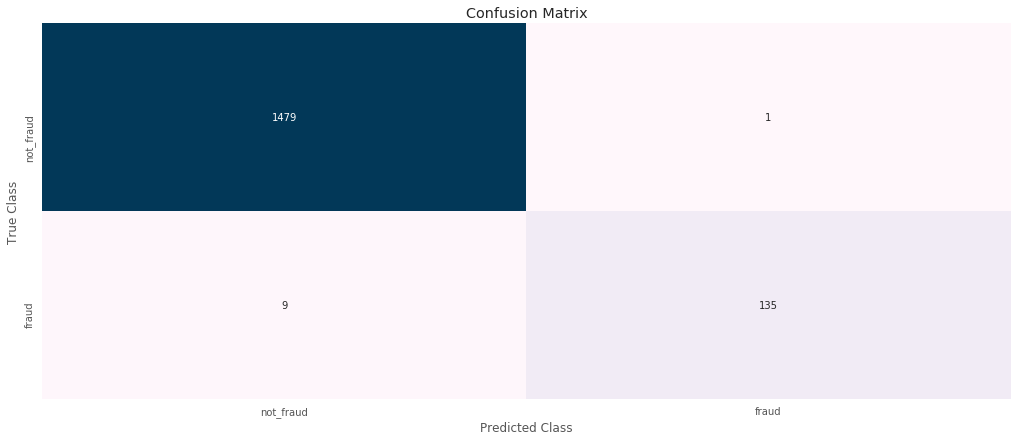

In [25]:
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(y_test, pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="PuBu", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [26]:
from sklearn.metrics import f1_score, recall_score
f1_score = round(f1_score(y_test, pred), 2)
recall_score = round(recall_score(y_test, pred), 2)
print("Sensitivity/Recall for Logistic Regression Model 1 : {recall_score}".format(recall_score = recall_score))
print("F1 Score for Logistic Regression Model 1 : {f1_score}".format(f1_score = f1_score))

Sensitivity/Recall for Logistic Regression Model 1 : 0.94
F1 Score for Logistic Regression Model 1 : 0.96


Isolation Forest

In [27]:
from sklearn.ensemble import IsolationForest

iso  = IsolationForest()
iso.fit(X_train,y_train)

IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)

In [28]:
pred =  iso.predict(X_test)
pred = np.where(pred==1,0,pred)
pred =  np.where(pred==-1,1,pred)

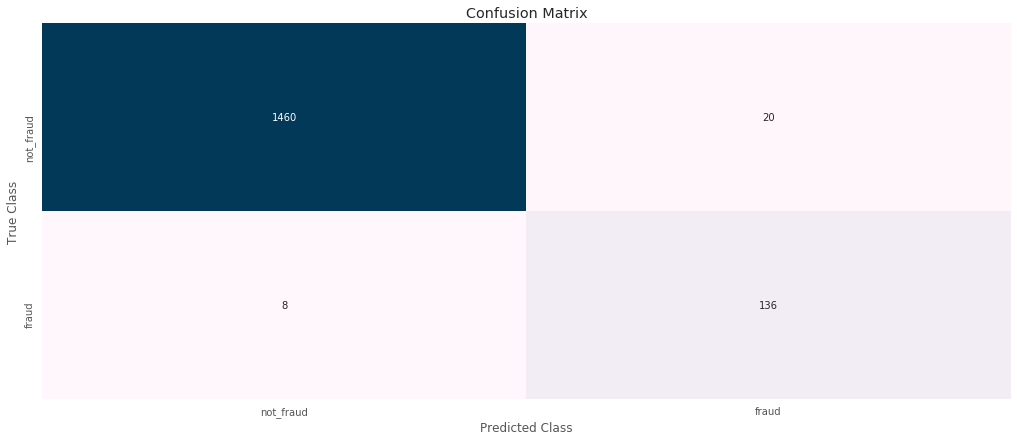

In [29]:
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(y_test, pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="PuBu", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [30]:
from sklearn.metrics import f1_score, recall_score
f1_score = round(f1_score(y_test, pred), 2)
recall_score = round(recall_score(y_test, pred), 2)
print("Sensitivity/Recall for Isolation 2 : {recall_score}".format(recall_score = recall_score))
print("F1 Score for IsoLation Model 2 : {f1_score}".format(f1_score = f1_score))

Sensitivity/Recall for Isolation 2 : 0.94
F1 Score for IsoLation Model 2 : 0.91


In [75]:
def matrix_data(y_test,pred, model_name):
    from sklearn.metrics import f1_score, recall_score
    class_names = ['not_fraud', 'fraud']
    matrix = confusion_matrix(y_test, pred)
    # Create pandas dataframe
    dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
    # Create heatmap
    sns.heatmap(dataframe, annot=True, cbar=None, cmap="PuBu", fmt = 'g')
    plt.title("Confusion Matrix"), plt.tight_layout()
    plt.ylabel("True Class"), plt.xlabel("Predicted Class")
    plt.show()
    
    f1_score = round(f1_score(y_test, pred), 2)
    recall_score = round(recall_score(y_test, pred), 2)
    print("Sensitivity/Recall for {model_name} : {recall_score}".format(model_name=model_name,recall_score = recall_score))
    print("F1 Score for IsoLation {model_name} : {f1_score}".format(model_name=model_name,f1_score = f1_score))
    
    

KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.cross_validation  import KFold
from sklearn.model_selection import GridSearchCV,cross_val_score,cross_validate,StratifiedKFold
from sklearn.pipeline import Pipeline,check_memory
from sklearn.decomposition import PCA


In [33]:
model =  {
    "auto_knn": KNeighborsClassifier(n_neighbors=2),
    "kdtree_knn": Pipeline([('pca',PCA(n_components=5)),("knn",KNeighborsClassifier(n_neighbors=2,algorithm='kd_tree'))]),
    "ball_knn": Pipeline([('pca',PCA(n_components=10)),("knn",KNeighborsClassifier(n_neighbors=2,algorithm='ball_tree'))]),
    "bfs_knn": Pipeline([('pca',PCA(n_components=10)),("knn",KNeighborsClassifier(n_neighbors=2,algorithm='brute'))]),
}


########################################################################

auto_knn KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')


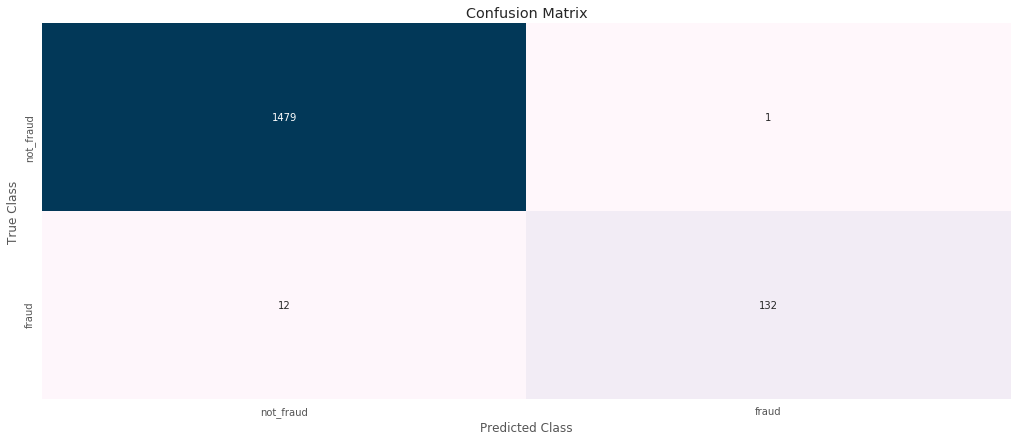

Sensitivity/Recall for auto_knn : 0.92
F1 Score for IsoLation auto_knn : 0.95

########################################################################


########################################################################

kdtree_knn Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('knn', KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform'))])


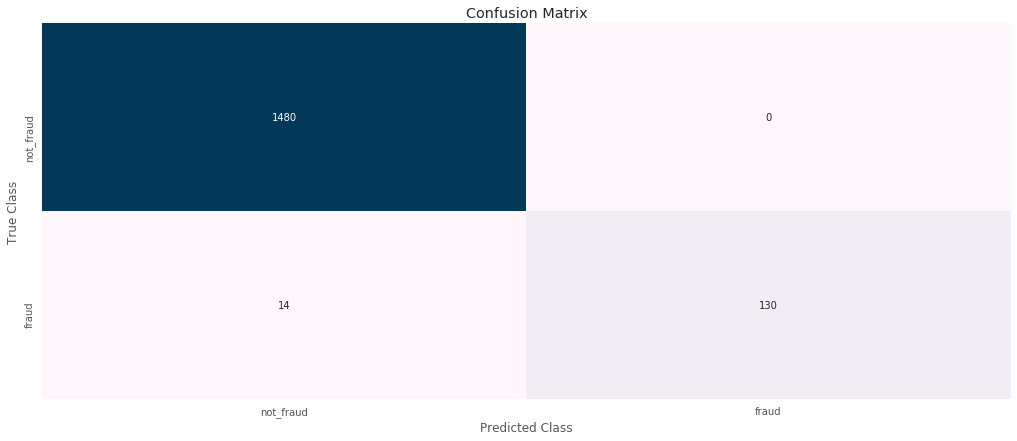

Sensitivity/Recall for kdtree_knn : 0.9
F1 Score for IsoLation kdtree_knn : 0.95

########################################################################


########################################################################

ball_knn Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('knn', KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform'))])


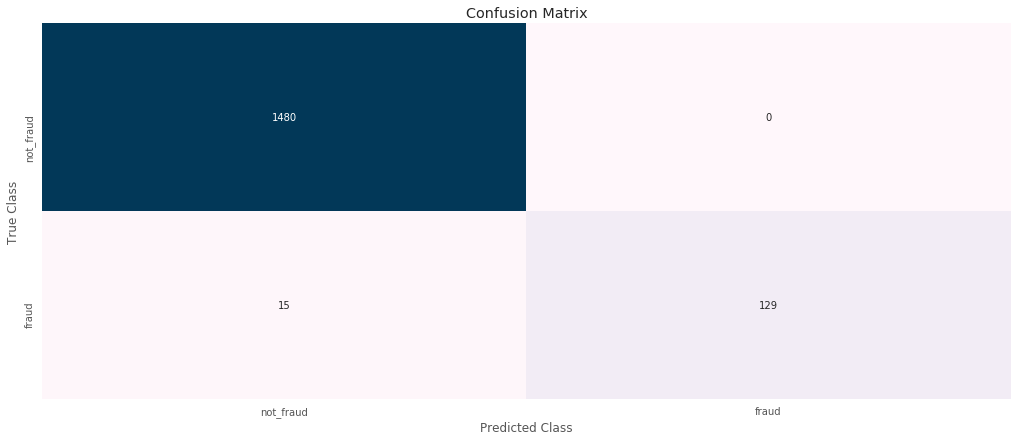

Sensitivity/Recall for ball_knn : 0.9
F1 Score for IsoLation ball_knn : 0.95

########################################################################


########################################################################

bfs_knn Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('knn', KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform'))])


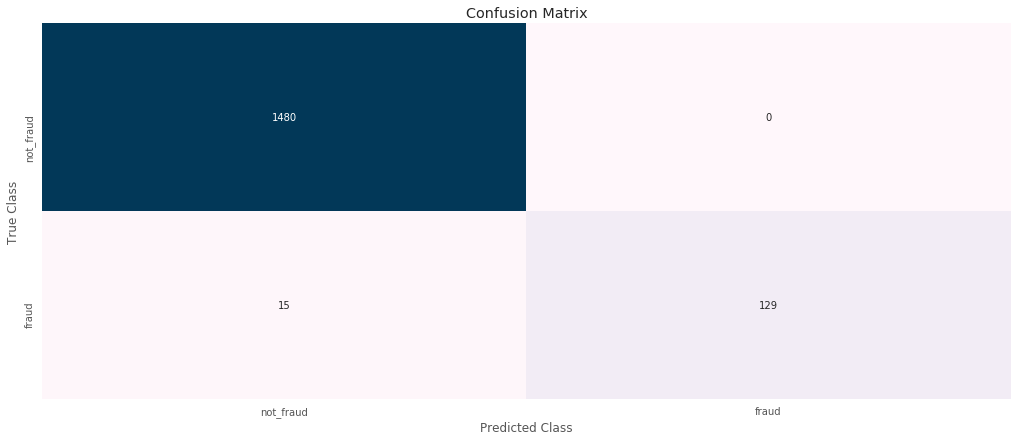

Sensitivity/Recall for bfs_knn : 0.9
F1 Score for IsoLation bfs_knn : 0.95

########################################################################



In [34]:
for i,j in model.items():
    print("\n########################################################################\n")
    print(i,j)
    mk_model = j.fit(X_train,y_train)
    pred = j.predict(X_test)
    matrix_data(y_test,pred,i)
    del j
    print("\n########################################################################\n")

SVM

In [531]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV


In [36]:
parmas_SVM = {
    "C":np.arange(0.1,1,0.2),"kernel":['linear', 'rbf', 'sigmoid'],
    "degree":[3,7]
}

finder_data = RandomizedSearchCV(SVC(),parmas_SVM)
finder_data.fit(X_train,y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'C': array([0.1, 0.3, 0.5, 0.7, 0.9]), 'kernel': ['linear', 'rbf', 'sigmoid'], 'degree': [3, 7]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [37]:
pd.DataFrame(finder_data.cv_results_)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:1

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_degree,param_kernel,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.013506,0.002570,0.993136,0.995908,0.1,3,linear,"{'kernel': 'linear', 'degree': 3, 'C': 0.1}",5,0.995249,0.996040,0.990499,0.996436,0.993661,0.995249,0.002039,0.000244,0.001975,0.000493
1,0.044616,0.019604,0.993136,0.996304,0.5,3,rbf,"{'kernel': 'rbf', 'degree': 3, 'C': 0.50000000...",5,0.995249,0.996436,0.990499,0.996040,0.993661,0.996437,0.001038,0.000462,0.001975,0.000187
2,0.086041,0.031459,0.901267,0.902455,0.7,3,sigmoid,"{'kernel': 'sigmoid', 'degree': 3, 'C': 0.7000...",9,0.910530,0.902178,0.896279,0.905347,0.896989,0.899842,0.004227,0.000858,0.006558,0.002256
3,0.015968,0.002092,0.993664,0.996568,0.7,7,linear,"{'kernel': 'linear', 'degree': 7, 'C': 0.70000...",2,0.996041,0.997624,0.991291,0.996832,0.993661,0.995249,0.000807,0.000225,0.001940,0.000987
4,0.016357,0.002525,0.993928,0.996700,0.9,3,linear,"{'kernel': 'linear', 'degree': 3, 'C': 0.90000...",1,0.996041,0.997624,0.992082,0.996832,0.993661,0.995645,0.001548,0.000791,0.001627,0.000813
5,0.045160,0.020360,0.993400,0.996568,0.7,7,rbf,"{'kernel': 'rbf', 'degree': 7, 'C': 0.70000000...",3,0.995249,0.997228,0.990499,0.996436,0.994453,0.996041,0.001734,0.000480,0.002078,0.000493
6,0.013381,0.002163,0.993136,0.996436,0.3,7,linear,"{'kernel': 'linear', 'degree': 7, 'C': 0.30000...",5,0.996041,0.997228,0.990499,0.996436,0.992868,0.995645,0.002107,0.000163,0.002271,0.000646
7,0.086706,0.032007,0.901267,0.902455,0.7,7,sigmoid,"{'kernel': 'sigmoid', 'degree': 7, 'C': 0.7000...",9,0.910530,0.902178,0.896279,0.905347,0.896989,0.899842,0.004079,0.002010,0.006558,0.002256
8,0.086817,0.030850,0.903643,0.904699,0.5,7,sigmoid,"{'kernel': 'sigmoid', 'degree': 7, 'C': 0.5000...",8,0.912906,0.904554,0.901029,0.907723,0.896989,0.901821,0.002759,0.000560,0.006755,0.002412
9,0.015106,0.002217,0.993400,0.996568,0.5,7,linear,"{'kernel': 'linear', 'degree': 7, 'C': 0.50000...",3,0.996041,0.997624,0.990499,0.996436,0.993661,0.995645,0.000707,0.000251,0.002270,0.000813


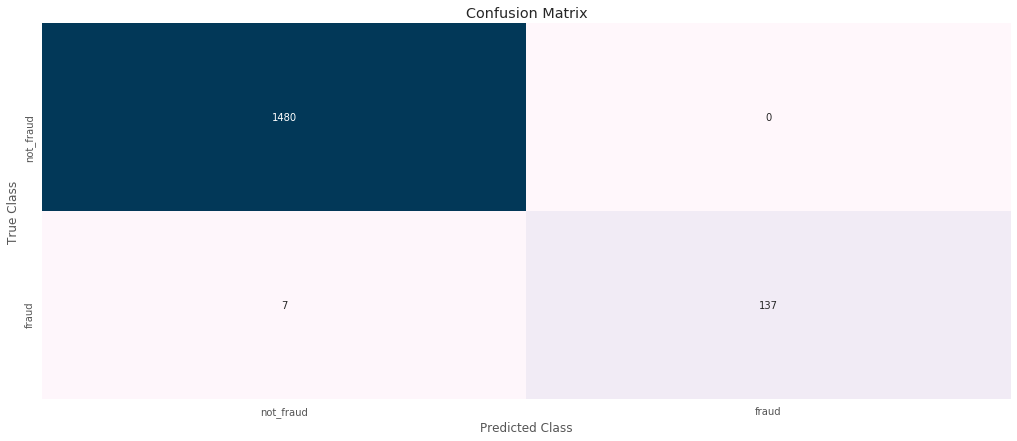

Sensitivity/Recall for SVC : 0.95
F1 Score for IsoLation SVC : 0.98


In [38]:
pred = finder_data.best_estimator_.predict(X_test)
matrix_data(y_test,pred=pred,model_name='SVC')

Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params_cv = {
    "criterion":['gini','entropy'],
}

finder_DT = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=params_cv)
finder_DT.fit(X_train,y_train)
best_DT = finder_DT.best_estimator_
pd.DataFrame(finder_DT.cv_results_)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:1

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_criterion,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.058596,0.000556,0.991024,1.0,gini,{'criterion': 'gini'},2,0.992874,1.0,0.988915,1.0,0.991284,1.0,0.004887,0.000042,0.001627,0.0
1,0.085125,0.000505,0.991288,1.0,entropy,{'criterion': 'entropy'},1,0.992082,1.0,0.990499,1.0,0.991284,1.0,0.006815,0.000018,0.000647,0.0


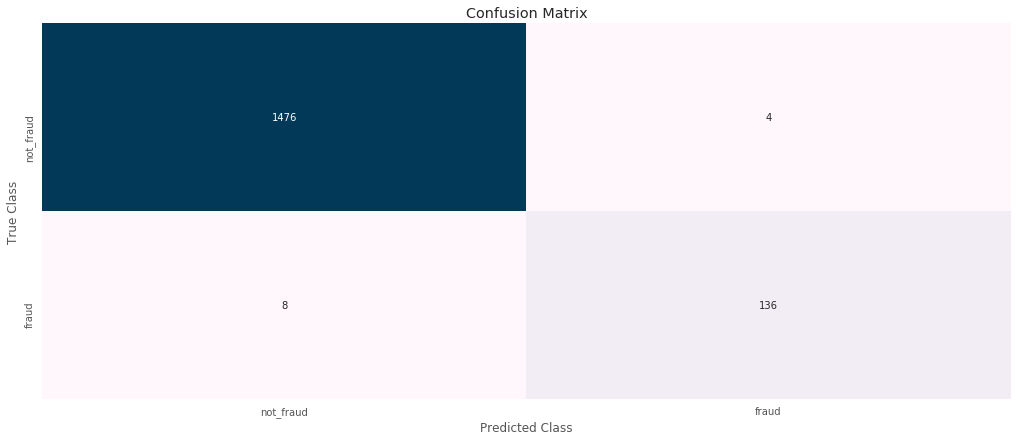

Sensitivity/Recall for DT : 0.94
F1 Score for IsoLation DT : 0.96


In [40]:
pred = best_DT.predict(X_test)
matrix_data(y_test,pred,'DT')

RandomForest

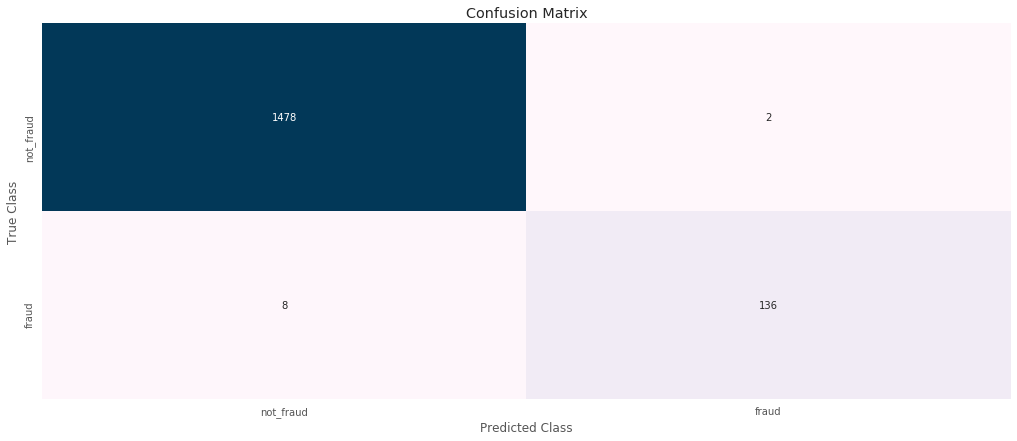

Sensitivity/Recall for RT : 0.94
F1 Score for IsoLation RT : 0.96


In [41]:
from sklearn.ensemble import RandomForestClassifier

RT =  RandomForestClassifier()

RT.fit(X_train,y_train)
pred =  RT.predict(X_test)
matrix_data(y_test,pred,'RT')

XGBOOST

In [42]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgbparams = {
    "max_depth":[3,5,8],
    "learning_rate":[1e-2,1e-4,1e-6,0.1],
    "booster":['gbtree','dart','gblinear']
}

In [43]:
finderXGB = GridSearchCV(xgb,xgbparams)
finderXGB.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 5, 8], 'learning_rate': [0.01, 0.0001, 1e-06, 0.1], 'booster': ['gbtree', 'dart', 'gblinear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [44]:
pd.DataFrame(finderXGB.cv_results_)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:1

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_booster,param_learning_rate,param_max_depth,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.386784,0.004325,0.993664,0.996040,gbtree,0.01,3,"{'booster': 'gbtree', 'learning_rate': 0.01, '...",1,0.993666,0.995644,0.992874,0.996436,0.994453,0.996041,0.001929,0.000920,0.000645,0.000323
1,0.580942,0.004841,0.992344,0.997228,gbtree,0.01,5,"{'booster': 'gbtree', 'learning_rate': 0.01, '...",11,0.992874,0.998020,0.992082,0.996832,0.992076,0.996833,0.004053,0.000227,0.000375,0.000560
2,0.807329,0.005135,0.992872,0.997624,gbtree,0.01,8,"{'booster': 'gbtree', 'learning_rate': 0.01, '...",9,0.992874,0.998416,0.993666,0.997624,0.992076,0.996833,0.094883,0.000238,0.000649,0.000646
3,0.387768,0.003719,0.990232,0.994588,gbtree,0.0001,3,"{'booster': 'gbtree', 'learning_rate': 0.0001,...",19,0.992874,0.994455,0.988915,0.994455,0.988906,0.994854,0.003348,0.000110,0.001868,0.000188
4,0.598389,0.004638,0.989704,0.995776,gbtree,0.0001,5,"{'booster': 'gbtree', 'learning_rate': 0.0001,...",23,0.992874,0.996832,0.988915,0.994851,0.987322,0.995645,0.003602,0.000370,0.002334,0.000814
5,0.690718,0.004774,0.989968,0.996172,gbtree,0.0001,8,"{'booster': 'gbtree', 'learning_rate': 0.0001,...",21,0.992874,0.996832,0.989707,0.996040,0.987322,0.995645,0.075044,0.000523,0.002274,0.000493
6,0.384379,0.003786,0.991288,0.994720,gbtree,1e-06,3,"{'booster': 'gbtree', 'learning_rate': 1e-06, ...",13,0.992874,0.994455,0.988915,0.994455,0.992076,0.995249,0.002368,0.000299,0.001710,0.000374
7,0.806939,0.004849,0.990760,0.996304,gbtree,1e-06,5,"{'booster': 'gbtree', 'learning_rate': 1e-06, ...",17,0.992874,0.996832,0.988915,0.994851,0.990491,0.997229,0.138576,0.000292,0.001628,0.001040
8,0.723257,0.004744,0.991024,0.996700,gbtree,1e-06,8,"{'booster': 'gbtree', 'learning_rate': 1e-06, ...",15,0.992874,0.996832,0.989707,0.996040,0.990491,0.997229,0.109158,0.000413,0.001347,0.000494
9,0.369341,0.004637,0.993664,0.999736,gbtree,0.1,3,"{'booster': 'gbtree', 'learning_rate': 0.1, 'm...",1,0.993666,0.999604,0.992082,1.000000,0.995246,0.999604,0.011790,0.000061,0.001291,0.000187


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


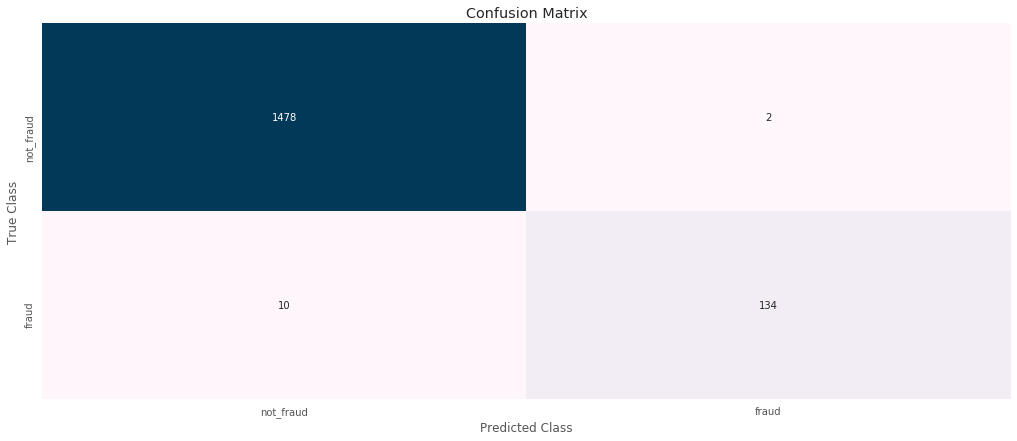

Sensitivity/Recall for XGB : 0.93
F1 Score for IsoLation XGB : 0.96


In [45]:
best_xgb = finderXGB.best_estimator_
pred = best_xgb.predict(X_test)
matrix_data(y_test,pred,'XGB')

LIGHTGBM

In [46]:
from lightgbm import LGBMClassifier
lgbparam ={
    "boosting_type":['gbdt','dart','goss']
}
finderLGB = GridSearchCV(LGBMClassifier(),lgbparam)
finderLGB.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

GridSearchCV(cv=None, error_score='raise',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'boosting_type': ['gbdt', 'dart', 'goss']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [47]:
pd.DataFrame(finderLGB.cv_results_)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:1

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_boosting_type,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.315257,0.014414,0.993400,1.000000,gbdt,{'boosting_type': 'gbdt'},2,0.995249,1.000000,0.989707,1.000000,0.995246,1.000000,0.005938,0.000070,0.002612,0.000000
1,0.417535,0.014101,0.994720,0.999472,dart,{'boosting_type': 'dart'},1,0.996041,0.999604,0.992874,0.999604,0.995246,0.999208,0.009110,0.000514,0.001345,0.000187
2,0.310739,0.018980,0.993136,1.000000,goss,{'boosting_type': 'goss'},3,0.994458,1.000000,0.989707,1.000000,0.995246,1.000000,0.003762,0.001153,0.002447,0.000000


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


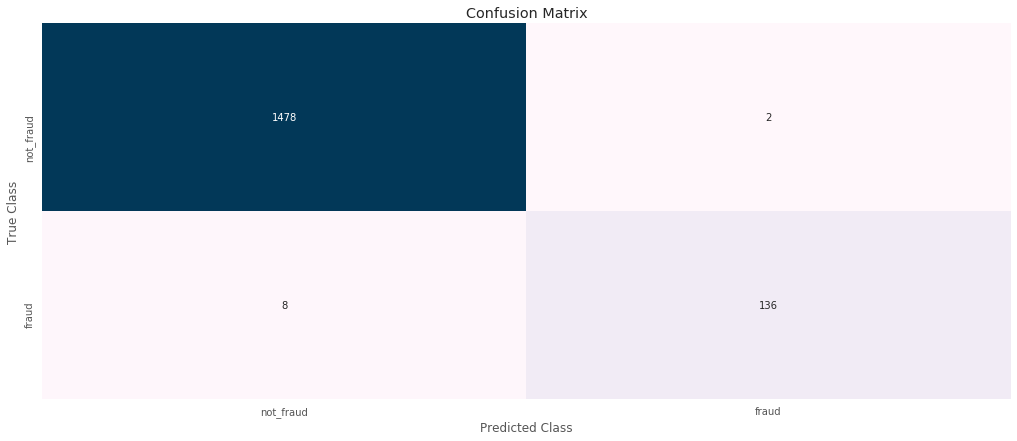

Sensitivity/Recall for LGB : 0.94
F1 Score for IsoLation LGB : 0.96


In [48]:
bestlgb =  finderLGB.best_estimator_
pred = bestlgb.predict(X_test)
matrix_data(y_test,pred,'LGB')

In [185]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, Y, train_size=0.70, test_size=0.30, random_state=1)
print("Length of X_train is: {X_train}".format(X_train = len(X_train1)))
print("Length of X_test is: {X_test}".format(X_test = len(X_test1)))
print("Length of y_train is: {y_train}".format(y_train = len(y_train1)))
print("Length of y_test is: {y_test}".format(y_test = len(y_test1)))

Length of X_train is: 199364
Length of X_test is: 85443
Length of y_train is: 199364
Length of y_test is: 85443


In [202]:
from keras.layers import Dense,Conv1D
from keras import Model
from keras.models import Sequential
from keras.utils import plot_model

In [207]:
try: del ann
except: pass
ann = Sequential()
ann.add(Dense(128,input_shape=(29,)))
ann.add(Dense(64,activation='relu'))
ann.add(Dense(1,activation='sigmoid'))
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [208]:
ann.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 128)               3840      
                                                                 
 dense_49 (Dense)            (None, 64)                8256      
                                                                 
 dense_50 (Dense)            (None, 1)                 65        
                                                                 
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
_________________________________________________________________


In [209]:
tdbrd = TensorBoard(log_dir="./logs")
callbacks = [EarlyStopping(patience=50),tdbrd]

In [210]:
BATCH_SIZE = 32
EPOCHS = 100
history_ann = ann.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=BATCH_SIZE,epochs=EPOCHS,callbacks=callbacks)

Epoch 1/100
119/119 [==============================] - 1s 5ms/step - loss: 0.1223 - accuracy: 0.9620 - val_loss: 0.0327 - val_accuracy: 0.9914
Epoch 2/100
119/119 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 0.9923 - val_loss: 0.0291 - val_accuracy: 0.9914
Epoch 3/100
119/119 [==============================] - 0s 3ms/step - loss: 0.0216 - accuracy: 0.9931 - val_loss: 0.0394 - val_accuracy: 0.9901
Epoch 4/100
119/119 [==============================] - 0s 3ms/step - loss: 0.0214 - accuracy: 0.9945 - val_loss: 0.0253 - val_accuracy: 0.9926
Epoch 5/100
119/119 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 0.9960 - val_loss: 0.0244 - val_accuracy: 0.9920
Epoch 6/100
119/119 [==============================] - 0s 3ms/step - loss: 0.0159 - accuracy: 0.9958 - val_loss: 0.0240 - val_accuracy: 0.9932
Epoch 7/100
119/119 [==============================] - 0s 3ms/step - loss: 0.0142 - accuracy: 0.9950 - val_loss: 0.0305 - val_accuracy: 0.9926

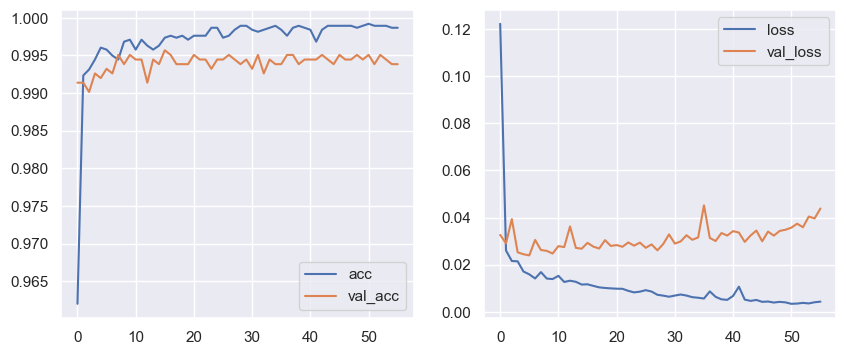

In [211]:
fig,ax = plt.subplots(ncols=2,nrows=1,figsize=(10,4))

ax[0].plot(history_ann.history['accuracy'],label='acc')
ax[0].plot(history_ann.history['val_accuracy'],label='val_acc')
ax[0].legend()

ax[1].plot(history_ann.history['loss'],label='loss')
ax[1].plot(history_ann.history['val_loss'],label='val_loss')
ax[1].legend()

In [212]:
pred = ann.predict(X_test)


51/51 [==============================] - 0s 1ms/step


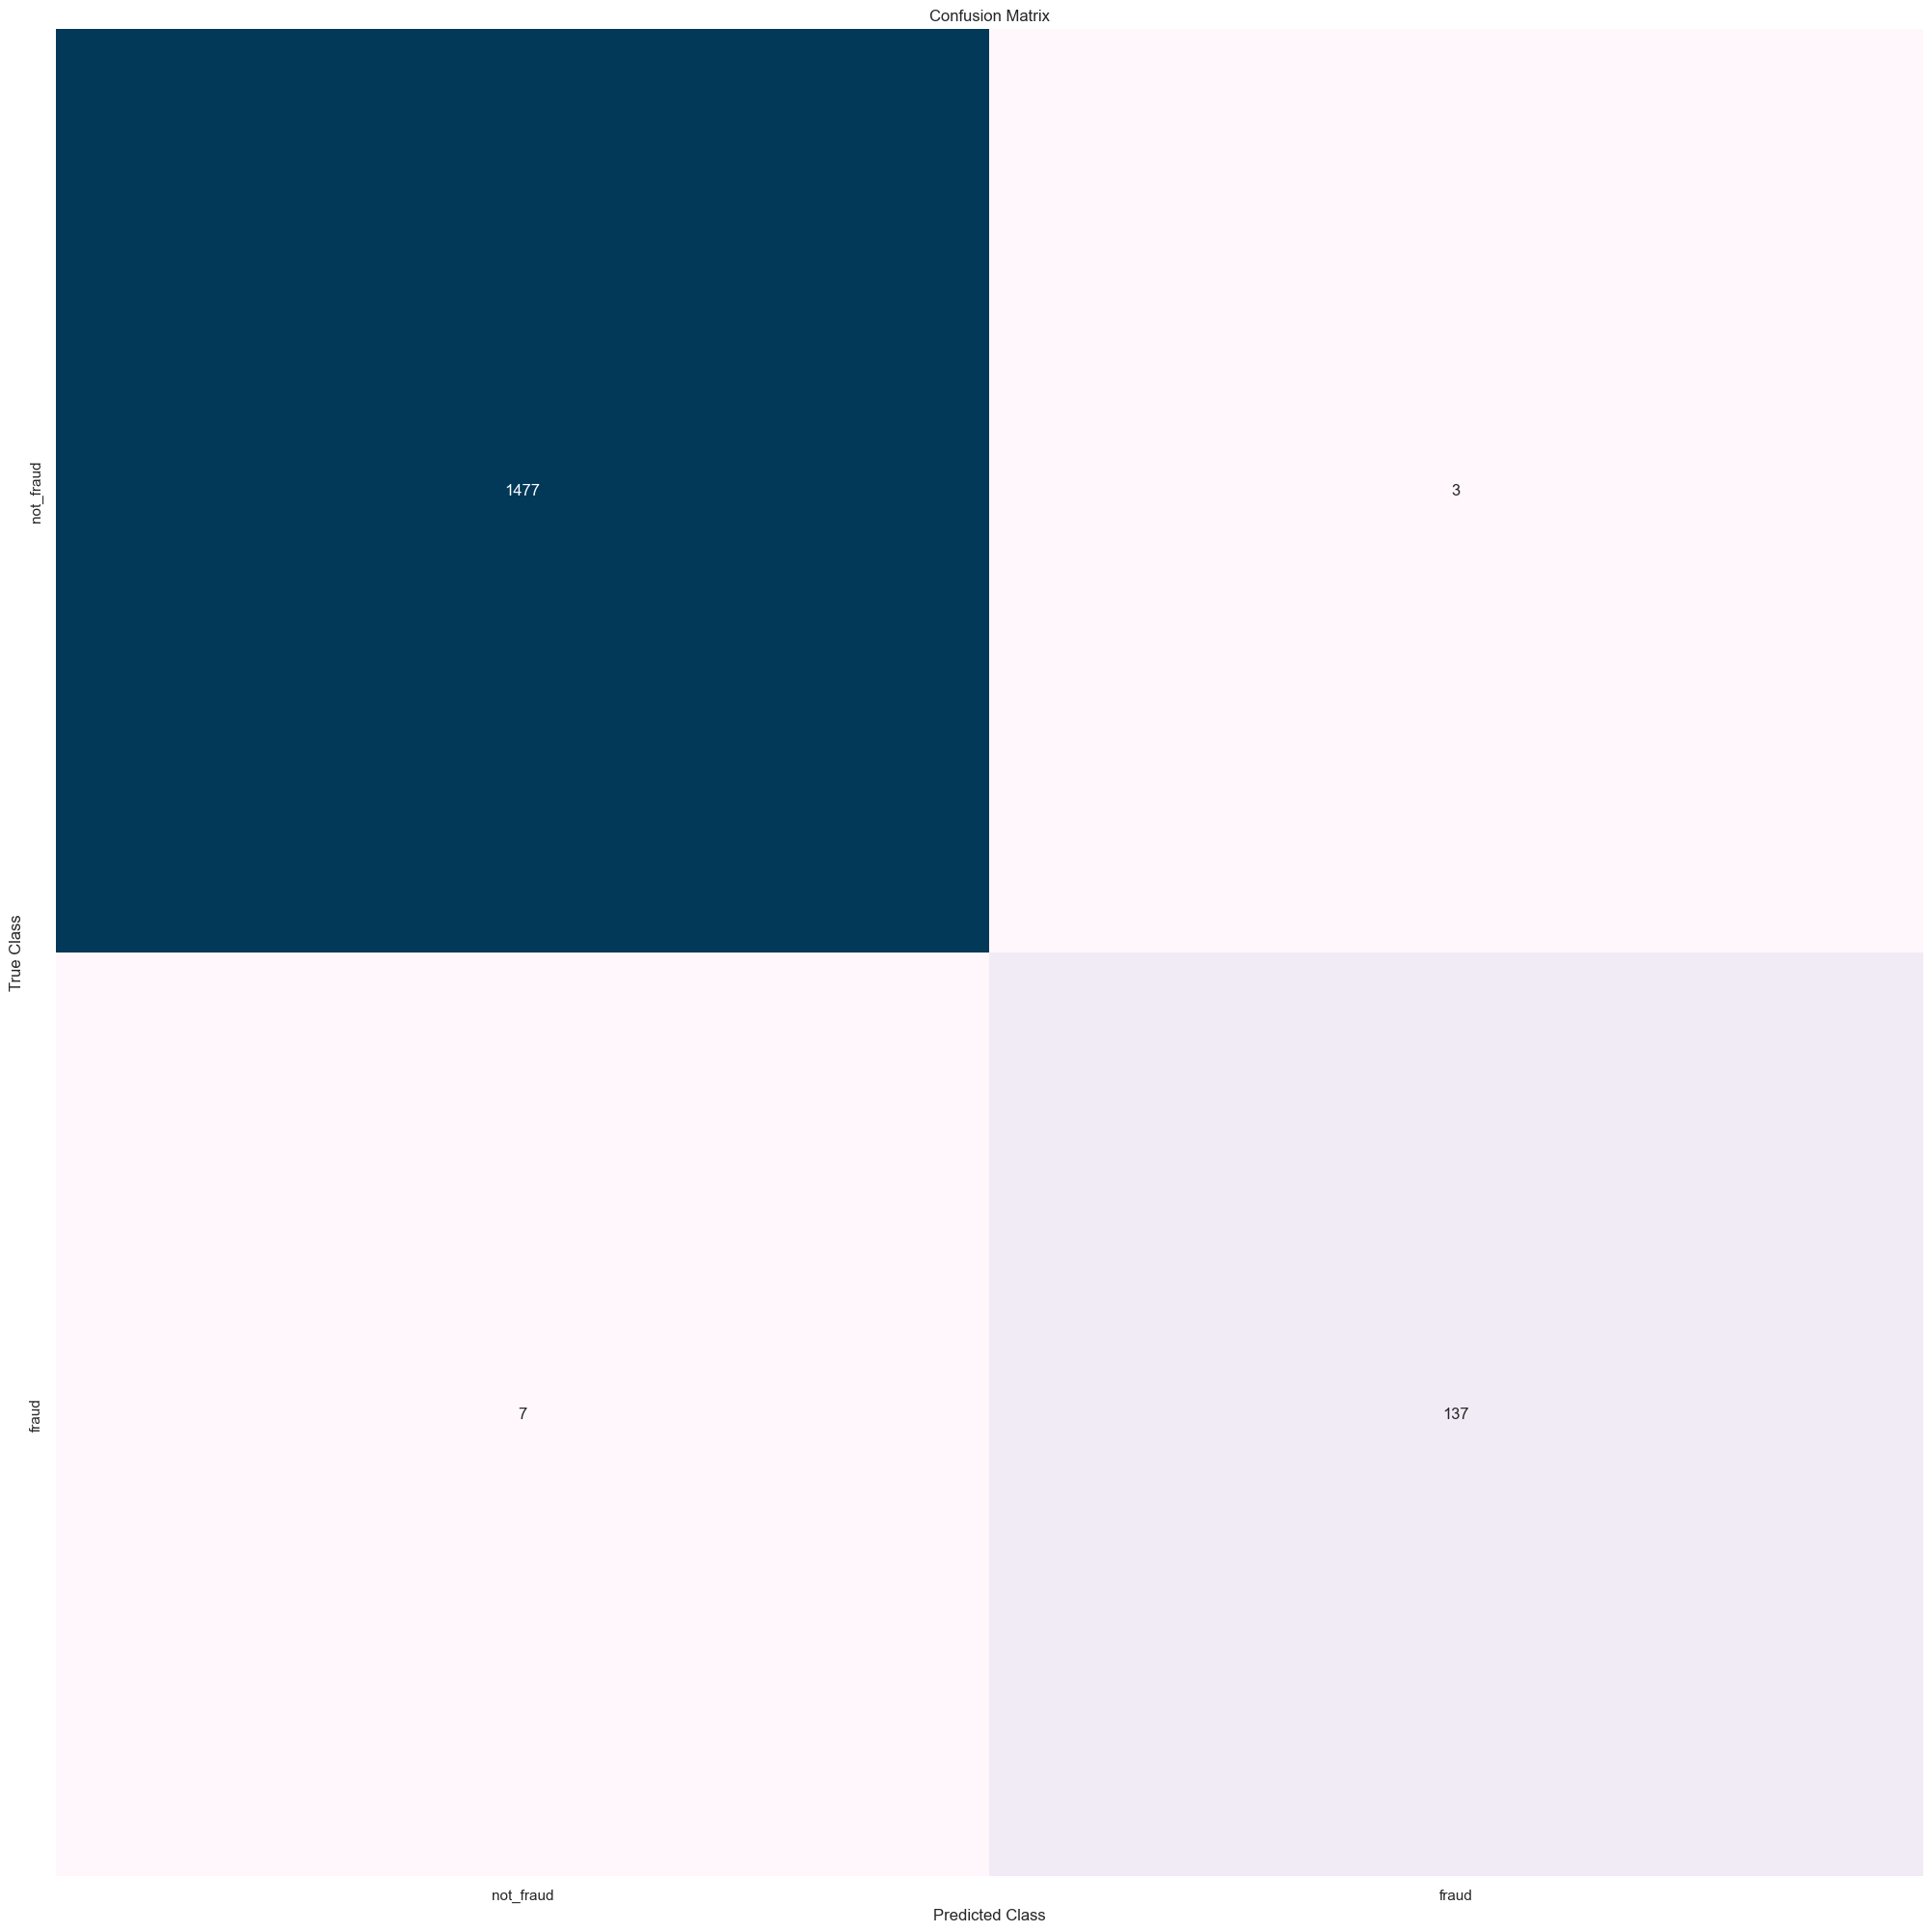

Sensitivity/Recall for ANN : 0.95
F1 Score for IsoLation ANN : 0.96


In [213]:
pred1 =np.where( pred.ravel()>0.5,1,0)
matrix_data(y_test,pred1,'ANN')

CNN

In [214]:
from keras.layers import Conv1D,Flatten,BatchNormalization,Dropout
from keras.optimizers import Adam,legacy_learning_rate_decay,schedules
from keras.callbacks import EarlyStopping,TensorBoard
initial_learning_rate=0.001
lr_schedule = schedules.learning_rate_schedule.ExponentialDecay(
    initial_learning_rate = initial_learning_rate,
    decay_steps=5,
    decay_rate=0.96,
    staircase=False
)

In [215]:
try: del cnnmodel
except: pass
cnnmodel=  Sequential()
cnnmodel.add(Conv1D(16,2,dilation_rate=4,activation='relu',input_shape=(29,1)))
cnnmodel.add(Conv1D(8,2,activation='relu',dilation_rate=1))
cnnmodel.add(BatchNormalization())
cnnmodel.add(Flatten())
cnnmodel.add(Dense(64,activation='relu'))
cnnmodel.add(Dropout(0.2))
cnnmodel.add(Dense(32,activation='relu'))
cnnmodel.add(Dense(1,activation='sigmoid'))
cnnmodel.compile(optimizer=Adam(learning_rate=lr_schedule),loss='binary_crossentropy',metrics=['accuracy'])

In [268]:
tdbrd = TensorBoard(log_dir="./logs")
callbacks = [EarlyStopping(patience=50),tdbrd]

In [217]:
BATCH_SIZE = 32
EPOCHS = 100
history_cnn = cnnmodel.fit(X_train,y_train,validation_data=(X_test1,y_test1),batch_size=BATCH_SIZE,epochs=EPOCHS,callbacks=callbacks)

Epoch 1/100
119/119 [==============================] - 6s 44ms/step - loss: 0.1213 - accuracy: 0.9728 - val_loss: 0.8688 - val_accuracy: 0.5804
Epoch 2/100
119/119 [==============================] - 5s 40ms/step - loss: 0.0338 - accuracy: 0.9905 - val_loss: 0.9882 - val_accuracy: 0.6306
Epoch 3/100
119/119 [==============================] - 5s 40ms/step - loss: 0.0291 - accuracy: 0.9918 - val_loss: 1.0206 - val_accuracy: 0.6516
Epoch 4/100
119/119 [==============================] - 5s 39ms/step - loss: 0.0295 - accuracy: 0.9921 - val_loss: 1.0450 - val_accuracy: 0.6564
Epoch 5/100
119/119 [==============================] - 5s 40ms/step - loss: 0.0307 - accuracy: 0.9918 - val_loss: 1.0553 - val_accuracy: 0.6625
Epoch 6/100
119/119 [==============================] - 5s 39ms/step - loss: 0.0265 - accuracy: 0.9926 - val_loss: 1.0569 - val_accuracy: 0.6641
Epoch 7/100
119/119 [==============================] - 5s 39ms/step - loss: 0.0291 - accuracy: 0.9913 - val_loss: 1.0334 - val_accuracy:

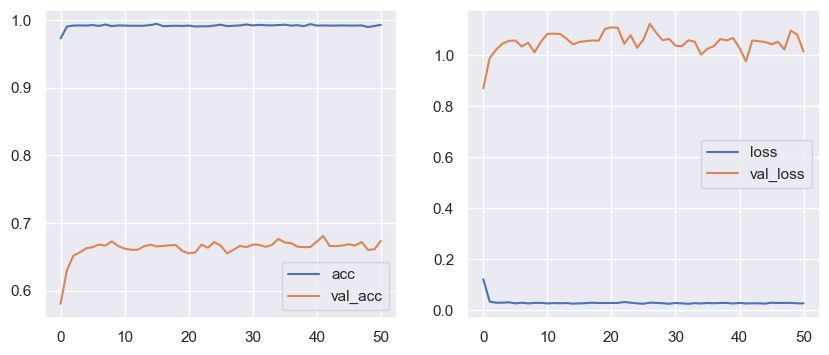

In [222]:
fig,ax = plt.subplots(ncols=2,nrows=1,figsize=(10,4))

ax[0].plot(history_cnn.history['accuracy'],label='acc')
ax[0].plot(history_cnn.history['val_accuracy'],label='val_acc')
ax[0].legend()

ax[1].plot(history_cnn.history['loss'],label='loss')
ax[1].plot(history_cnn.history['val_loss'],label='val_loss')
ax[1].legend()

In [223]:
pred = cnnmodel.predict(X_test)

51/51 [==============================] - 0s 2ms/step


In [224]:
y_test.value_counts()

0    1480
1     144
Name: Class, dtype: int64

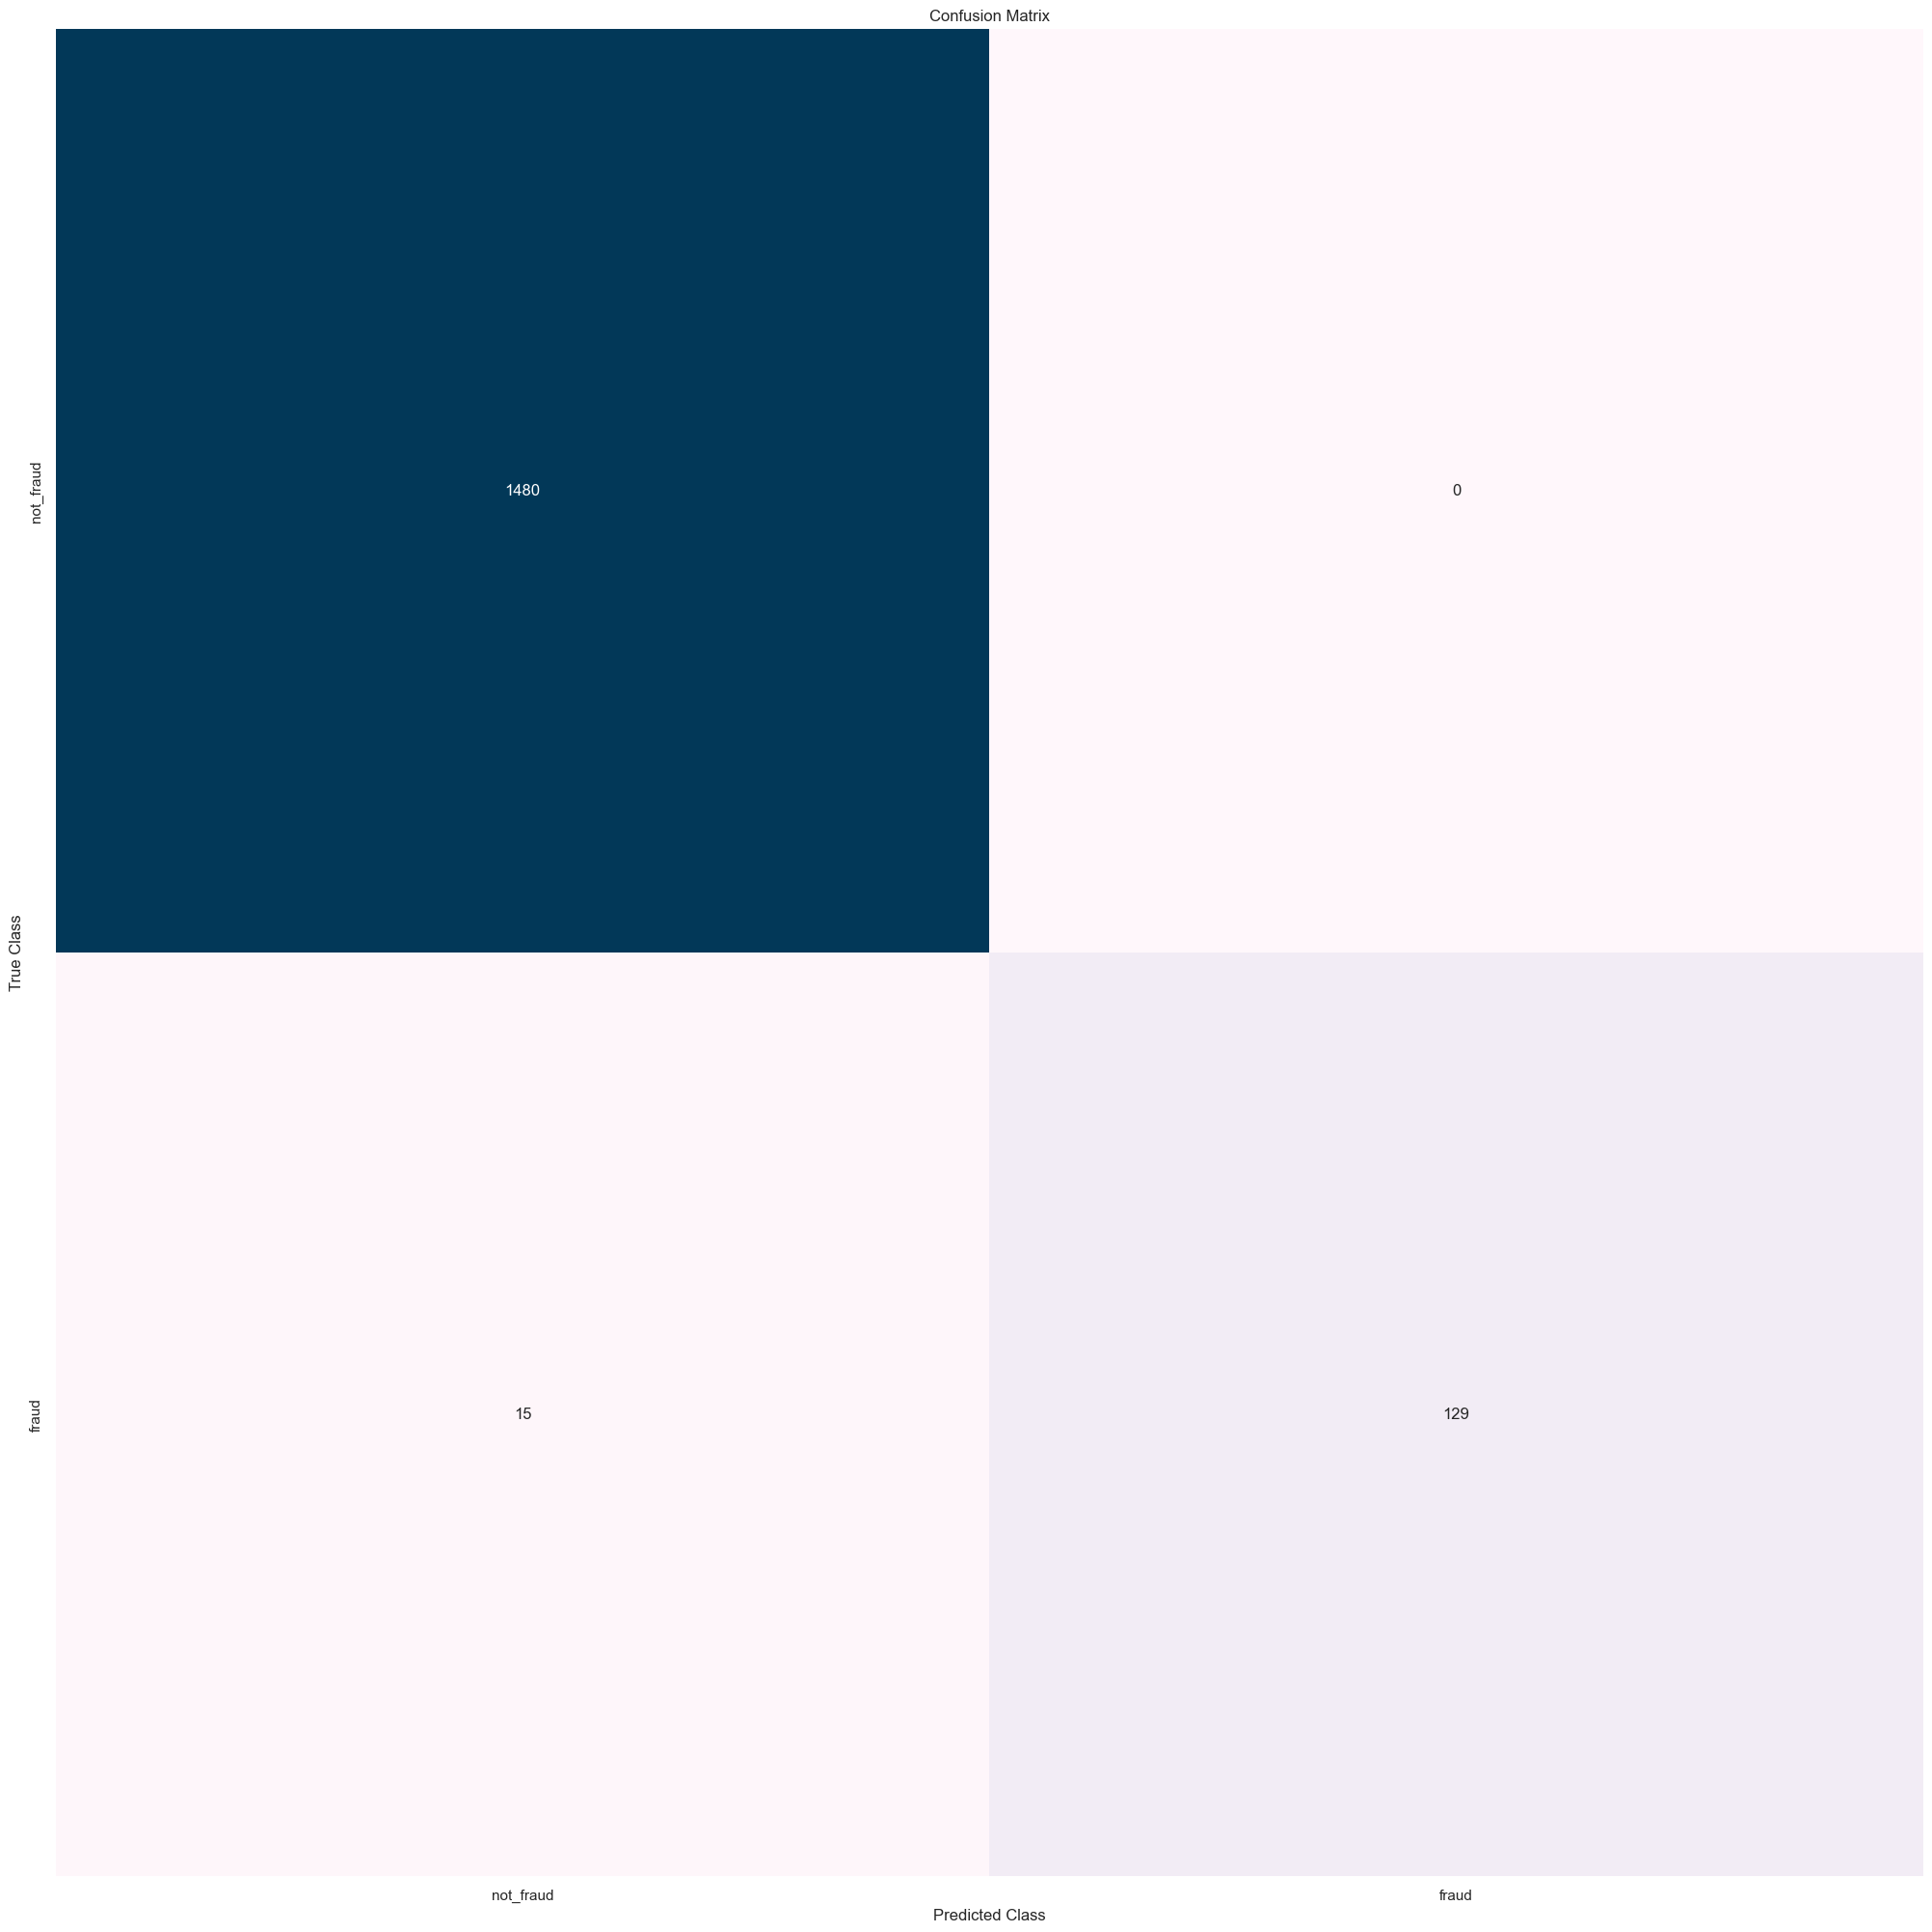

Sensitivity/Recall for CNN : 0.9
F1 Score for IsoLation CNN : 0.95


In [225]:
pred1 =np.where( pred.ravel()>0.5,1,0)
matrix_data(y_test,pred1,'CNN')

# AutoEncoder

In [644]:
import keras
from keras.layers import Input
from keras.optimizers import Adadelta
from keras.regularizers import L1
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)

class Encoder_Layer(keras.layers.Layer):
    def __init__(self):
        super(Encoder_Layer,self).__init__()
        self.__name__ =  'Encode_Layer'
        
    def call(self,x):
        x = Dense(100,activation='tanh')(x)
        x = Dense(70,activation='relu')(x)
        return x
    
class Decoder_Layer(keras.layers.Layer):
    def __init__(self):
        super(Decoder_Layer,self).__init__()
        self.__name__ = "Decode_Layer"
    
    def call(self,x):
        x = Dense(70,activation='tanh')(x)
        x= Dense(100,activation='tanh')(x)
        return x
    
    
class Trainer_Model_AUTOCODE(keras.Model):
    def __init__(self): 
        super(Trainer_Model_AUTOCODE,self).__init__()
        self.shaper =  (29,)
        self.encode = Encoder_Layer()
        self.decode = Decoder_Layer()
        self.outlayer = Dense(self.shaper[0],activation='relu')
        
    def call(self,x):
        x = self.encode(x)
        x = self.decode(x)
        x = self.outlayer(x)
        return x
    
    def build(self):
        x = Input(shape=self.shaper)
        return Model(inputs=x,outputs=self.call(x))
    
    
initial_learning_rate=0.01
lr_schedule = schedules.learning_rate_schedule.ExponentialDecay(
    initial_learning_rate = initial_learning_rate,
    decay_steps=5,
    decay_rate=0.96,
    staircase=False
)

try: del autocode
except: pass
autocode = Trainer_Model_AUTOCODE().build()
autocode.compile(optimizer=Adadelta(learning_rate=lr_schedule),loss='mse')
autocode.summary()

Model: "model_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_49 (InputLayer)       [(None, 29)]              0         
                                                                 
 encoder__layer_62 (Encoder_  (None, 70)               0         
 Layer)                                                          
                                                                 
 decoder__layer_42 (Decoder_  (None, 100)              0         
 Layer)                                                          
                                                                 
 dense_628120 (Dense)        (None, 29)                2929      
                                                                 
Total params: 2,929
Trainable params: 2,929
Non-trainable params: 0
_________________________________________________________________


In [632]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
transstd = MinMaxScaler(feature_range=(-1,1))
xs1 = transstd.fit_transform(xs)

In [633]:
xs1 = pd.DataFrame(xs1)

In [645]:
dfp = pd.concat([xs,ys],axis=1)
dfk = dfp[dfp['Class']==0]

In [646]:
xt = dfk.iloc[:,:-1].values
yt =  dfk.iloc[:,-1].values

In [647]:
BATCH_SIZE = 128
EPOCHS = 10

history_autocode = autocode.fit(xt,xt,validation_split=0.2,batch_size=BATCH_SIZE,epochs=EPOCHS,callbacks=callbacks)

Epoch 1/10
 3/31 [=>............................] - ETA: 0s - loss: 0.4590

C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning:

Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.



31/31 [==============================] - 1s 45ms/step - loss: 0.4674 - val_loss: 0.4478
Epoch 2/10
31/31 [==============================] - 1s 43ms/step - loss: 0.4763 - val_loss: 0.4314
Epoch 3/10
31/31 [==============================] - 1s 47ms/step - loss: 0.4588 - val_loss: 0.4425
Epoch 4/10
31/31 [==============================] - 1s 44ms/step - loss: 0.4673 - val_loss: 0.4622
Epoch 5/10
31/31 [==============================] - 1s 47ms/step - loss: 0.4682 - val_loss: 0.4562
Epoch 6/10
31/31 [==============================] - 1s 42ms/step - loss: 0.4706 - val_loss: 0.4340
Epoch 7/10
31/31 [==============================] - 1s 43ms/step - loss: 0.4693 - val_loss: 0.4422
Epoch 8/10
31/31 [==============================] - 1s 41ms/step - loss: 0.4715 - val_loss: 0.4386
Epoch 9/10
31/31 [==============================] - 1s 41ms/step - loss: 0.4733 - val_loss: 0.4586
Epoch 10/10
31/31 [==============================] - 1s 40ms/step - loss: 0.4777 - val_loss: 0.4436


In [648]:


encodemodel = Sequential(
    [Input((29,)),Encoder_Layer()]
    
)

In [649]:
xse_data = pd.DataFrame(encodemodel.predict(xs))

 15/170 [=>............................] - ETA: 1s

C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning:

Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.



170/170 [==============================] - 2s 11ms/step


In [650]:
new_df = pd.concat([xse_data,ys],axis=1)
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,Class
0,0.214992,1.089203,0.0,0.301164,0.116227,0.230816,0.124380,0.416158,0.000000,0.0,...,0.0,0.0,0.060822,0.527653,0.0,0.0,0.0,0.0,0.0,0
1,0.214992,1.089203,0.0,0.301164,0.116227,0.230816,0.124380,0.416158,0.000000,0.0,...,0.0,0.0,0.060822,0.527653,0.0,0.0,0.0,0.0,0.0,0
2,0.205186,1.074647,0.0,0.275930,0.084713,0.235122,0.126554,0.429103,0.000000,0.0,...,0.0,0.0,0.026186,0.543559,0.0,0.0,0.0,0.0,0.0,0
3,0.218343,1.036703,0.0,0.280624,0.054716,0.252110,0.049284,0.354056,0.000953,0.0,...,0.0,0.0,0.042489,0.516359,0.0,0.0,0.0,0.0,0.0,0
4,0.223375,1.044519,0.0,0.293020,0.070803,0.249560,0.048063,0.348083,0.006865,0.0,...,0.0,0.0,0.060042,0.508364,0.0,0.0,0.0,0.0,0.0,0


In [651]:

new_df = new_df.sample(frac=1)


In [652]:
X_train_n,X_test_n,y_train_n,y_test_n = train_test_split(new_df.iloc[:,:-1],new_df.iloc[:,-1],test_size=0.2,shuffle=True)

In [653]:
model = LogisticRegression(max_iter=4000)
model.fit(X_train_n, y_train_n.values.ravel())

LogisticRegression(max_iter=4000)

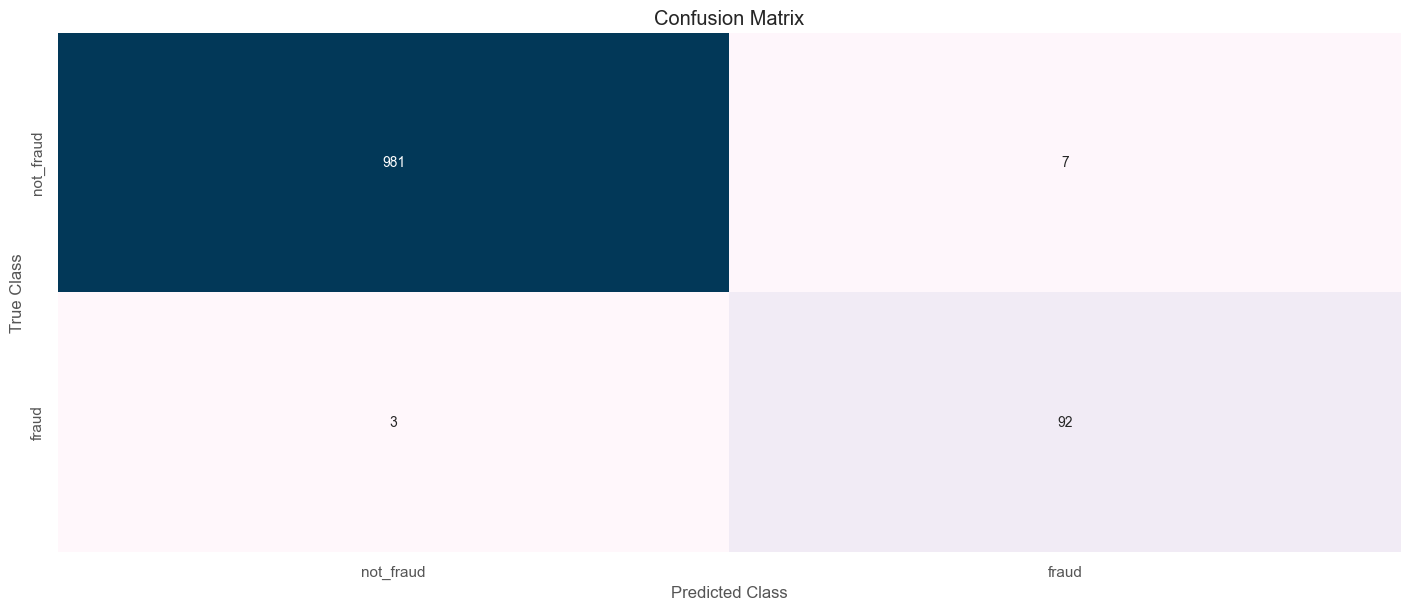

Sensitivity/Recall for ED_Log : 0.97
F1 Score for IsoLation ED_Log : 0.95


In [654]:
pred = model.predict(X_test_n)
matrix_data(y_test_n,pred,"ED_Log")

In [657]:
tf.__version__,keras.__version__

('2.10.0', '2.10.0')